## Data Collection

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
def extract_articles_from_page(page_number):
    url = f"https://www.ft.com/search?q=amazon+Inc.&page={page_number}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    articles = []
    for article in soup.find_all('div', class_='o-teaser'):
        title_tag = article.find('a', class_='js-teaser-heading-link')
        date_tag = article.find('time', class_='o-teaser__timestamp-date')

        if title_tag and date_tag:
            title = title_tag.get_text(strip=True)
            date = date_tag.get_text(strip=True)
            articles.append((date, title))

    return articles

all_articles = []
for page in range(1, 200):
    print(f"Scraping page {page}")
    articles = extract_articles_from_page(page)
    all_articles.extend(articles)

# Write the data to a CSV file
with open('amazone_news_articles.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['Date', 'Title'])
    # Write the articles
    for article in all_articles:
        writer.writerow(article)

print("Data has been written to apple_news_articles.csv")


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
def extract_articles_from_page(page_number):
    url = f"https://markets.businessinsider.com/news/amzn-stock?p={page_number}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    articles = []
    for article in soup.find_all('div', class_='latest-news__story'):
        title_tag = article.find('a', class_='news-link')
        date_tag = article.find('time', class_='latest-news__date')

        if title_tag and date_tag:
            title = title_tag.get_text(strip=True)
            date = date_tag.get_text(strip=True)
            articles.append((date, title))

    return articles

all_articles = []
for page in range(1, 150):
    print(f"Scraping page {page}")
    articles = extract_articles_from_page(page)
    all_articles.extend(articles)

# Write the data to a CSV file
with open('market_amazone_news_articles.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['Date', 'Title'])
    # Write the articles
    for article in all_articles:
        writer.writerow(article)

print("Data has been written to market_amazon_news_articles.csv")


Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Scraping page 37
Scraping page 38
Scraping page 39
Scraping page 40
Scraping page 41
Scraping page 42
Scraping page 43
Scraping page 44
Scraping page 45
Scraping page 46
Scraping page 47
Scraping page 48
Scraping page 49
Scraping page 50
Scraping page 51
Scraping page 52
Scraping page 53
Scraping page 54
Scraping page 55
Scraping page 56
Scraping page 57
Scraping page 58
Scraping page 59
Scrapi

# Data Cleaning

In [ ]:
import csv
from datetime import datetime, timedelta

def convert_relative_time_to_date(relative_time):
    now = datetime.now()
    if 'h' in relative_time:
        hours_ago = int(relative_time.replace('h', ''))
        return (now - timedelta(hours=hours_ago)).strftime('%Y-%m-%d')
    elif 'd' in relative_time:
        # Handling comma-separated numbers in days
        days_ago = int(relative_time.replace('d', '').replace(',', ''))
        return (now - timedelta(days=days_ago)).strftime('%Y-%m-%d')
    else:
        return relative_time  # If the date is already in the correct format

def process_csv(file_name):
    with open(file_name, mode='r', newline='', encoding='utf-8') as infile:
        reader = csv.reader(infile)
        rows = list(reader)

    headers = rows[0]  # Assuming the first row is the header
    data_rows = rows[1:]  # The rest are the data rows

    for row in data_rows:
        row[0] = convert_relative_time_to_date(row[0])  # Assuming the date is in the first column

    with open(file_name, mode='w', newline='', encoding='utf-8') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(headers)  # Write the header row
        writer.writerows(data_rows)  # Write the updated data rows

# File path
file_name = '/content/market_amazone_news_articles.csv'

# Process the CSV file
process_csv(file_name)

print("Data in the file has been updated")


Data in the file has been updated


In [ ]:
import pandas as pd

def merge_titles_by_date(file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Group by the date and join the titles
    merged_df = df.groupby('Date')['Title'].apply(' '.join).reset_index()

    # Save the resulting DataFrame back to the original CSV file
    merged_df.to_csv(file_path, index=False)

    print(f'Merged titles have been saved to {file_path}')

# Example usage
file_path = '/content/market_amazone_news_articles.csv'
merge_titles_by_date(file_path)

Merged titles have been saved to /content/market_tesla_news_articles.csv


# Stock Data


In [ ]:
import yfinance as yf


In [ ]:
AMZN= yf.Ticker("AMZN")

In [ ]:
AMZN.history(period="1mo")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-20 00:00:00-04:00,184.339996,186.669998,183.279999,183.539993,30511800,0.0,0.0
2024-05-21 00:00:00-04:00,182.300003,183.259995,180.750000,183.149994,50839100,0.0,0.0
2024-05-22 00:00:00-04:00,183.880005,185.220001,181.970001,183.130005,28148800,0.0,0.0
2024-05-23 00:00:00-04:00,183.660004,184.759995,180.080002,181.050003,33670200,0.0,0.0
2024-05-24 00:00:00-04:00,181.649994,182.440002,180.300003,180.750000,27434100,0.0,0.0
2024-05-28 00:00:00-04:00,179.929993,182.240005,179.490005,182.149994,29927000,0.0,0.0
2024-05-29 00:00:00-04:00,181.699997,184.080002,181.550003,182.020004,32009300,0.0,0.0
2024-05-30 00:00:00-04:00,181.309998,181.339996,178.360001,179.320007,29249200,0.0,0.0
2024-05-31 00:00:00-04:00,178.300003,179.210007,173.869995,176.440002,58903900,0.0,0.0


In [ ]:
import yfinance as yf
from datetime import datetime, timedelta

# Set the end date to today's date
end_date = datetime.today().strftime('%Y-%m-%d')

# Set the start date to 10/11/2019
start_date = '2022-12-04'

# Get historical stock data for AMZN from start_date to end_date
data = yf.download('AMZN', start=start_date, end=end_date)

# Save the data to a CSV file
output_file = 'AMZN_stock.csv'
data.to_csv(output_file)

print(f"Data saved to {output_file}")


[*********************100%%**********************]  1 of 1 completed

Data saved to TSLA_stock.csv


# Labeling

In [ ]:
import pandas as pd

# Provide the paths of CSV files in Google Colab
file1_path = '/content/market_amazone_news_articles.csv'
file2_path = '/content/AMZN_stock.csv'

# Load data from both files
data1 = pd.read_csv(file1_path)
data2 = pd.read_csv(file2_path)

# Convert 'Date' column to datetime format
data1['Date'] = pd.to_datetime(data1['Date'])
data2['Date'] = pd.to_datetime(data2['Date'])

# Initialize an empty list to store labels
labels = []

# Iterate through dates in file1 and find next day's closing price in file2
for date in data1['Date']:
    # Find the index of the current date in file2
    idx = data2[data2['Date'] == date].index
    if len(idx) > 0 and idx[0] < len(data2) - 1:
        next_day_close = data2.loc[idx[0] + 1, 'Close']
        today_close = data2.loc[idx[0], 'Close']
        # Label 1 if next day's price is higher, otherwise 0
        label = 1 if next_day_close > today_close else 0
    else:
        # If next day's data is not available, assign label as -1
        label = -1
    labels.append(label)

# Add 'Label' column to file1
data1['Label'] = labels

# Save the updated data to the same file
data1.to_csv(file1_path, index=False)

print("Labels added to file1.csv.")


Labels added to file1.csv.


In [ ]:
import pandas as pd

# Provide the path of the CSV file containing the 'Label' column
file_path = '/content/market_amazone_news_articles.csv'

# Load data from the file
data = pd.read_csv(file_path)

# Remove rows where 'Label' column contains -1
data = data[data['Label'] != -1]

# Save the updated data to the same file
data.to_csv(file_path, index=False)

print("Rows with Label -1 removed from the file.")


Rows with Label -1 removed from the file.


In [ ]:
import pandas as pd

# Provide the path of the CSV file containing the 'Label' column
file_path = '/content/market_amazone_news_articles.csv'

# Load data from the file
data = pd.read_csv(file_path)

# Count the number of zeros and ones in the 'Label' column
zeros_count = (data['Label'] == 0).sum()
ones_count = (data['Label'] == 1).sum()

print(f"Number of zeros: {zeros_count}")
print(f"Number of ones : {ones_count}")


Number of zeros: 221
Number of ones : 218


# Encoding

In [ ]:
import pandas as pd

# Provide the path of the CSV file
file_path = '/content/market_amazone_news_articles.csv'

# Load data from the CSV file
df = pd.read_csv(file_path, encoding="ISO-8859-1")
df1 = pd.read_csv(file_path, encoding="ISO-8859-1")

In [ ]:
df1.head()

,Date,Title,Label
0,2022-09-19,Elon Musk said Starlink will request exemption...,0
1,2022-09-20,Elon Musk's vision for Twitter has freaked out...,0
2,2022-09-21,4 EV Stocks to Buy on the Dip or Youâll Be K...,0
3,2022-09-22,EVs to account for 60% of new car sales by 203...,0
4,2022-09-23,Fossil or Green Energy Stocks: Which is the Be...,1


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df contains your dataset

# Splitting the data into train and test sets (80:20 ratio)
train_df1, test_df1 = train_test_split(df1, test_size=0.2, random_state=42)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Print the sizes of train and test sets
print("Train set size:", len(train_df1))
print("Test set size:", len(test_df1))


Train set size: 351
Test set size: 88


In [ ]:
test_df1.head()

,Date,Title,Label
265,2023-10-09,Driving Forward: How Li Auto is Shaping the 20...,1
78,2023-01-10,Is More Trouble Ahead for U.S. Auto Stocks? Wh...,1
347,2024-02-06,3 EV Stocks on the Fast Track to Double in 202...,1
255,2023-09-25,7 Growth Stocks to Buy as Fed Maintains Status...,0
327,2024-01-08,If You Can Only Buy One Hydrogen Stock in Janu...,0


In [ ]:
import pandas as pd

# Assuming 'train' is your DataFrame containing the training dataset

# Removing punctuations from the 'Title' column
train_df['Title'] = train_df['Title'].str.replace("[^a-zA-Z]", " ", regex=True)

# Renaming column names for ease of access (if necessary)
# list1 = [i for i in range(25)]
# new_Index = [str(i) for i in list1]
# data.columns = new_Index

# Displaying the modified DataFrame
train_df.head()


,Date,Title,Label
165,2023-08-03,Analysts Opinions Are Mixed on These Techno...,1
322,2024-03-19,From Six Figures to Seven AI Stocks Set to ...,1
220,2023-10-20,Rivian NASDAQ RIVN Wall Street Loves This E...,1
94,2023-04-21,Stocks and Cryptos That Could Make You a For...,0
232,2023-11-07,The Next Big Stream Media Stocks Ready to C...,0


In [ ]:
# Assuming 'train' is your DataFrame containing the training dataset

# Convert the 'Title' column to lowercase
train_df['Title'] = train_df['Title'].str.lower()

# Displaying the modified DataFrame
train_df.head()


,Date,Title,Label
165,2023-08-03,analysts opinions are mixed on these techno...,1
322,2024-03-19,from six figures to seven ai stocks set to ...,1
220,2023-10-20,rivian nasdaq rivn wall street loves this e...,1
94,2023-04-21,stocks and cryptos that could make you a for...,0
232,2023-11-07,the next big stream media stocks ready to c...,0


In [ ]:
# Assuming 'train' is your DataFrame containing the training dataset

# Create a list from the 'Title' column
headlines = train_df['Title'].tolist()

# Display the first few elements of the list
print(headlines[:5])  # Displaying the first 5 elements for example


['analysts    opinions are mixed on these technology stocks  aurora innovation  aur  and amazon  amzn  amazon  amzn  gets a buy from goldman sachs   cheap hydrogen stocks that smart investors will snap up now amazon com inc  q  earnings summary crude oil rises       kellogg posts upbeat earnings amazoneps of        revenue of       b beats by      b   cheap machine learning stocks that smart investors will snap up now elon musk wants tim cook to change another rule for x after taking shots at apple for years investors should be excited about this stock market selloff market clubhouse morning memo   august  rd        trade strategy for spy  qqq  aapl  amzn  msft  and nvda  amazon likely to post quarterly profit  here s a look at recent price target changes by the most accurate analysts is a giant short squeeze brewing in rite aid  rad  stock    cheap quantum computing stocks that smart investors will snap up now   best stocks to buy now            according to top analysts sell alert   

# Training

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

In [ ]:
traindataset[0]

<1x18208 sparse matrix of type '<class 'numpy.int64'>'
	with 169 stored elements in Compressed Sparse Row format>

In [ ]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train_df['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
# Assuming you have already trained your model and defined countvector and randomclassifier

# Transform the 'Title' column of test data
test_transform = countvector.transform(test_df['Title'])

# Make predictions
predictions = randomclassifier.predict(test_transform)


In [ ]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
matrix=confusion_matrix(test_df['Label'],predictions)
print(matrix)
score=accuracy_score(test_df['Label'],predictions)
print(score)
report=classification_report(test_df['Label'],predictions)
print(report)

[[ 8 30]
 [ 6 33]]
0.5324675324675324
              precision    recall  f1-score   support

           0       0.57      0.21      0.31        38
           1       0.52      0.85      0.65        39

    accuracy                           0.53        77
   macro avg       0.55      0.53      0.48        77
weighted avg       0.55      0.53      0.48        77



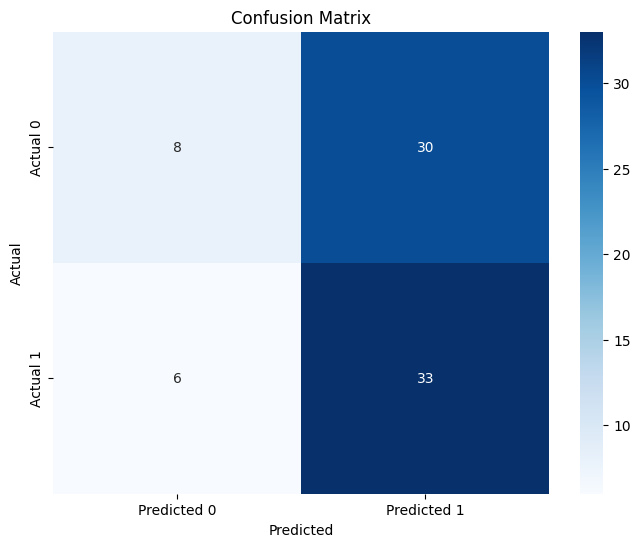

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


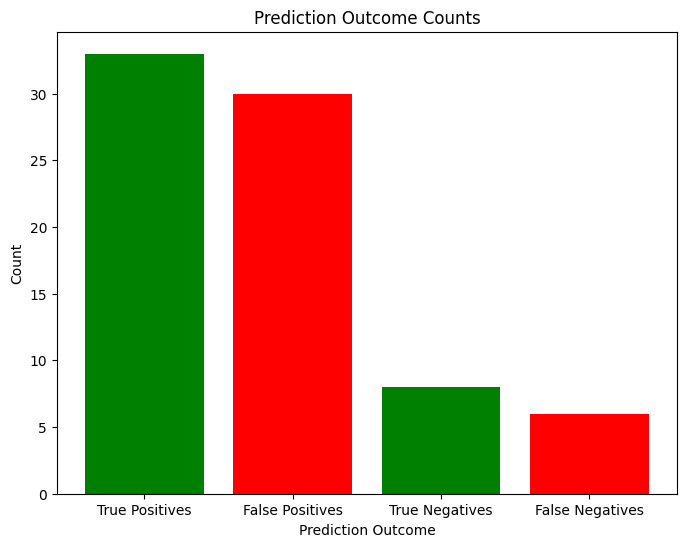

In [ ]:
# Calculate counts for true positives, false positives, true negatives, false negatives
tp = matrix[1, 1]
fp = matrix[0, 1]
tn = matrix[0, 0]
fn = matrix[1, 0]

# Plot bar graph
plt.figure(figsize=(8, 6))
bars = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
values = [tp, fp, tn, fn]
colors = ['green', 'red', 'green', 'red']  # Green for correct predictions, red for incorrect

plt.bar(bars, values, color=colors)
plt.xlabel('Prediction Outcome')
plt.ylabel('Count')
plt.title('Prediction Outcome Counts')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tfidfvector=TfidfVectorizer(ngram_range=(2,2))
traindataset=tfidfvector.fit_transform(headlines)

In [ ]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train_df['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
# Assuming you have already trained your model and defined countvector and randomclassifier

# Transform the 'Title' column of test data
test_transform = tfidfvector.transform(test_df['Title'])

# Make predictions
predictions = randomclassifier.predict(test_transform)


In [ ]:
matrix=confusion_matrix(test_df['Label'],predictions)
print(matrix)
score=accuracy_score(test_df['Label'],predictions)
print(score)
report=classification_report(test_df['Label'],predictions)
print(report)

[[19 19]
 [12 27]]
0.5974025974025974
              precision    recall  f1-score   support

           0       0.61      0.50      0.55        38
           1       0.59      0.69      0.64        39

    accuracy                           0.60        77
   macro avg       0.60      0.60      0.59        77
weighted avg       0.60      0.60      0.59        77



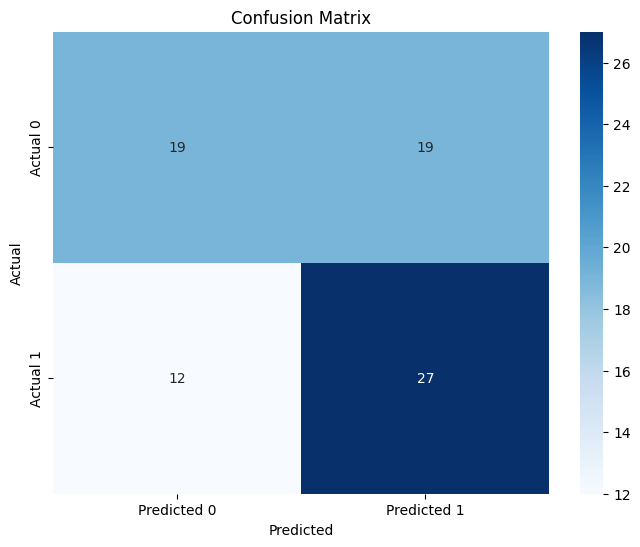

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


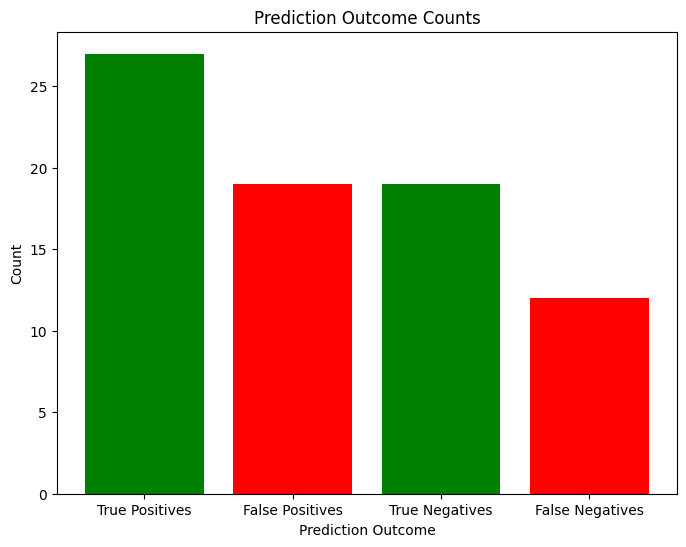

In [ ]:
# Calculate counts for true positives, false positives, true negatives, false negatives
tp = matrix[1, 1]
fp = matrix[0, 1]
tn = matrix[0, 0]
fn = matrix[1, 0]

# Plot bar graph
plt.figure(figsize=(8, 6))
bars = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
values = [tp, fp, tn, fn]
colors = ['green', 'red', 'green', 'red']  # Green for correct predictions, red for incorrect

plt.bar(bars, values, color=colors)
plt.xlabel('Prediction Outcome')
plt.ylabel('Count')
plt.title('Prediction Outcome Counts')
plt.show()


# Buy and Sell

In [ ]:
# Add a new column 'buyorsell' based on the 'predictions' column
test_df['buyorsell'] = test_df['predictions'].apply(lambda x: 'B' if x == 1 else 'S')

# Print the first few rows to verify
print(test_df.head())


           Date                                              Title  Label  \
268  2023-12-29  AI and Automation Leaders for 2024: 7 Stocks t...      0   
250  2023-12-04  Bulletproof Investments: 3 Stocks That Will Be...      1   
355  2024-05-06  7 Stocks to Buy to Satisfy Your IRA Limits in ...      1   
332  2024-04-03  Alphabet (NASDAQ:GOOGL): Is This Magnificent S...      0   
56   2023-02-27  Elon Musk is once again the richest person in ...      1   

     predictions buyorsell  
268            1         B  
250            1         B  
355            1         B  
332            1         B  
56             1         B  


In [ ]:
# Count the number of zeros and ones in the 'predictions' column
prediction_counts = test_df['predictions'].value_counts()

# Get the count of zeros and ones
num_zeros = prediction_counts.get(0, 0)
num_ones = prediction_counts.get(1, 0)

# Print the results
print(f"Number of zeros (sell): {num_zeros}")
print(f"Number of ones (buy): {num_ones}")


Number of zeros (sell): 15
Number of ones (buy): 62


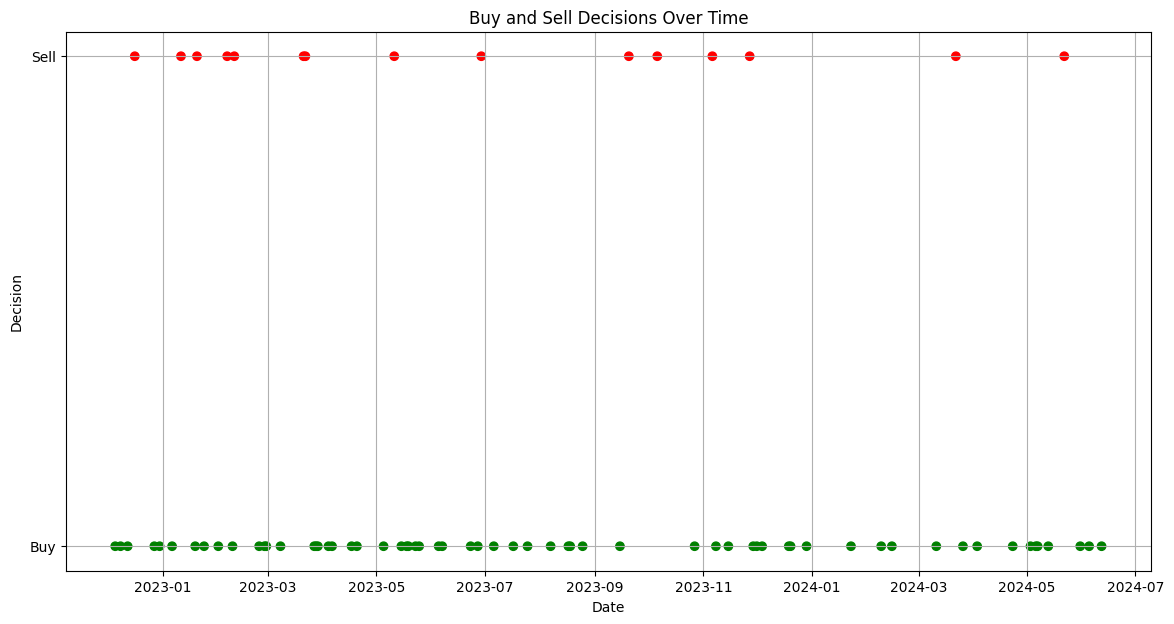

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your test_df looks like this:
# test_df = pd.DataFrame({
#     'date': ['2024-06-19', '2024-06-20', '2024-06-21', ...],
#     'predictions': [1, 0, 1, ...]
# })

# Ensure the 'date' column is of datetime type
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Add a new column 'buyorsell' based on the 'predictions' column
test_df['buyorsell'] = test_df['predictions'].apply(lambda x: 'B' if x == 1 else 'S')

# Create a color column for plotting
test_df['color'] = test_df['predictions'].apply(lambda x: 'green' if x == 1 else 'red')

# Plotting
plt.figure(figsize=(14, 7))

# Plot each point
plt.scatter(test_df['Date'], test_df['buyorsell'], c=test_df['color'], marker='o')

# Add titles and labels
plt.title('Buy and Sell Decisions Over Time')
plt.xlabel('Date')
plt.ylabel('Decision')
plt.yticks(['B', 'S'], ['Buy', 'Sell'])

# Show the plot
plt.grid(True)
plt.show()


# Profit_amazon

In [ ]:
import pandas as pd
import numpy as np

# Load the stock prices data
stock_prices = pd.read_csv('/content/AMZN_stock.csv')  # Replace with your actual file path
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])

# Ensure test_df's 'date' column is datetime type
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Merge test_df with stock_prices based on 'date'
merged_df = pd.merge(test_df, stock_prices, on='Date', how='inner')

# Initialize variables
initial_capital = 10000
capital = initial_capital
stocks_held = 0
transactions = []
total_trades = 0
winning_trades = 0

# Lists to store daily portfolio values and drawdowns
portfolio_values = []
daily_returns = []
max_drawdown = 0
current_max = 0

# Iterate over merged_df
for i in range(len(merged_df)):
    prediction = merged_df.loc[i, 'predictions']
    current_date = merged_df.loc[i, 'Date']
    current_close = merged_df.loc[i, 'Close']

    # Calculate daily return
    if i > 0:
        daily_return = (merged_df.loc[i, 'Close'] / merged_df.loc[i - 1, 'Close']) - 1
        daily_returns.append(daily_return)

    if prediction == 1:
        # Buy stocks
        if capital > 0:
            buy_price = current_close
            stocks_bought = capital / buy_price
            stocks_held += stocks_bought
            capital = 0
            transactions.append((current_date, 'Buy', buy_price))
            total_trades += 1
    elif prediction == 0:
        # Sell all held stocks if sell price > buy price
        if stocks_held > 0:
            sell_price = current_close
            buy_price = transactions[-1][2] if transactions else None  # Get last buy price
            if buy_price and sell_price > buy_price:
                capital = stocks_held * sell_price
                transactions.append((current_date, 'Sell', sell_price))
                stocks_held = 0
                total_trades += 1
                if sell_price > buy_price:
                    winning_trades += 1

    # Calculate portfolio value and drawdown
    portfolio_value = capital + stocks_held * current_close
    portfolio_values.append(portfolio_value)

    if portfolio_value > current_max:
        current_max = portfolio_value
    drawdown = (portfolio_value - current_max) / current_max
    if drawdown < max_drawdown:
        max_drawdown = drawdown

# Calculate final metrics
final_value = portfolio_values[-1]
profit = final_value - initial_capital
sharpe_ratio = np.mean(daily_returns) / np.std(daily_returns) * np.sqrt(252)  # Assuming 252 trading days in a year
win_ratio = winning_trades / total_trades * 100 if total_trades > 0 else 0

# Print results
print(f"Final capital: {final_value:.2f}")
print(f"Profit: {profit:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2f}")
print(f"Number of Trades Executed: {total_trades}")
print(f"Win Ratio: {win_ratio:.2f}%")

# Print all transactions
print("\nTransactions:")
for transaction in transactions:
    print(f"{transaction[0]} - {transaction[1]} at {transaction[2]:.2f}")


Final capital: 8776.19
Profit: -1223.81
Sharpe Ratio: 2.34
Maximum Drawdown: -0.73
Number of Trades Executed: 7
Win Ratio: 42.86%

Transactions:
2023-12-29 00:00:00 - Buy at 151.94
2024-05-22 00:00:00 - Sell at 183.13
2023-11-29 00:00:00 - Buy at 146.32
2024-03-22 00:00:00 - Sell at 178.87
2023-03-29 00:00:00 - Buy at 100.25
2023-03-21 00:00:00 - Sell at 100.61
2024-03-11 00:00:00 - Buy at 171.96


In [ ]:
import pandas as pd
import numpy as np

# Load stock prices data
stock_prices = pd.read_csv('/content/AMZN_stock.csv')  # Replace with your actual file path
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])

# Ensure test_df's 'Date' column is datetime type
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Make a copy of test_df to avoid modification
test_df_copy = test_df.copy()

# Function to calculate moving averages
def calculate_moving_averages(data, short_window=20, long_window=50):
    data['short_mavg'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['long_mavg'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to implement strategy
def apply_moving_average_strategy(test_df, stock_prices):
    capital = 10000
    initial_capital = capital
    stocks_held = 0
    buy_price = None
    transactions = []
    daily_returns = []

    # Calculate moving averages on stock_prices
    stock_prices = calculate_moving_averages(stock_prices)

    for index, row in test_df.iterrows():
        date = row['Date']
        prediction = row['predictions']

        # Find corresponding stock price data for the date
        stock_data = stock_prices[stock_prices['Date'] == date]

        if len(stock_data) == 0:
            print(f"No data available for {date}. Skipping...")
            continue

        close_price = stock_data['Close'].values[0]

        if prediction == 1 and capital > 0:
            # Buy stocks
            buy_price = close_price
            stocks_bought = capital / buy_price
            stocks_held += stocks_bought
            capital = 0
            transactions.append((date, 'Buy', buy_price))
            print(f"{date} - Buy at {buy_price:.2f}")

        elif prediction == 0 and stocks_held > 0:
            # Sell all held stocks if sell price > buy price
            sell_price = close_price
            if sell_price > buy_price:  # Ensure selling at profit
                capital = stocks_held * sell_price
                daily_returns.append((capital - initial_capital) / initial_capital)
                transactions.append((date, 'Sell', sell_price))
                stocks_held = 0
                print(f"{date} - Sell at {sell_price:.2f}")

    # Calculate final value (if holding stock, sell at the last price available)
    if stocks_held > 0:
        final_value = stocks_held * stock_prices.iloc[-1]['Close']
    else:
        final_value = capital

    profit = final_value - 10000  # Initial capital

    # Calculate Sharpe ratio
    daily_returns = np.array(daily_returns)
    mean_daily_return = np.mean(daily_returns)
    std_daily_return = np.std(daily_returns)
    sharpe_ratio = mean_daily_return / std_daily_return * np.sqrt(252)  # Assuming 252 trading days in a year

    # Calculate maximum drawdown
    portfolio_values = [initial_capital] + [initial_capital * (1 + r) for r in daily_returns]
    cumulative_returns = np.array(portfolio_values)
    rolling_max = np.maximum.accumulate(cumulative_returns)
    drawdowns = (rolling_max - cumulative_returns) / rolling_max
    max_drawdown = np.max(drawdowns)

    # Calculate number of trades executed
    num_trades = len(transactions)

    # Calculate win ratio
    num_wins = sum(1 for t in transactions if t[1] == 'Sell' and t[2] > buy_price)
    win_ratio = num_wins / num_trades if num_trades > 0 else 0

    # Print results
    print(f"Final capital: {final_value:.2f}")
    print(f"Profit: {profit:.2f}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Maximum Drawdown: {max_drawdown:.2f}")
    print(f"Number of Trades Executed: {num_trades}")
    print(f"Win Ratio: {win_ratio:.2f}")

    # Print transactions
    print("\nTransactions:")
    for transaction in transactions:
        print(f"{transaction[0]} - {transaction[1]} at {transaction[2]:.2f}")

# Apply moving average strategy on test_df using stock_prices
apply_moving_average_strategy(test_df_copy, stock_prices)


2023-12-29 00:00:00 - Buy at 151.94
2024-05-22 00:00:00 - Sell at 183.13
2023-11-29 00:00:00 - Buy at 146.32
2024-03-22 00:00:00 - Sell at 178.87
2023-03-29 00:00:00 - Buy at 100.25
2023-03-21 00:00:00 - Sell at 100.61
2024-03-11 00:00:00 - Buy at 171.96
Final capital: 15719.92
Profit: 5719.92
Sharpe Ratio: 47.97
Maximum Drawdown: 0.00
Number of Trades Executed: 7
Win Ratio: 0.29

Transactions:
2023-12-29 00:00:00 - Buy at 151.94
2024-05-22 00:00:00 - Sell at 183.13
2023-11-29 00:00:00 - Buy at 146.32
2024-03-22 00:00:00 - Sell at 178.87
2023-03-29 00:00:00 - Buy at 100.25
2023-03-21 00:00:00 - Sell at 100.61
2024-03-11 00:00:00 - Buy at 171.96


Creating a test data set of Tesla


# Profit_Tesla

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
def extract_articles_from_page(page_number):
    url = f"https://markets.businessinsider.com/news/tsla-stock?p={page_number}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    articles = []
    for article in soup.find_all('div', class_='latest-news__story'):
        title_tag = article.find('a', class_='news-link')
        date_tag = article.find('time', class_='latest-news__date')

        if title_tag and date_tag:
            title = title_tag.get_text(strip=True)
            date = date_tag.get_text(strip=True)
            articles.append((date, title))

    return articles

all_articles = []
for page in range(1, 150):
    print(f"Scraping page {page}")
    articles = extract_articles_from_page(page)
    all_articles.extend(articles)

# Write the data to a CSV file
with open('market_tesla_news_articles.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['Date', 'Title'])
    # Write the articles
    for article in all_articles:
        writer.writerow(article)

print("Data has been written to market_tesla_news_articles.csv")


In [ ]:
# Assuming you have already trained your model and defined countvector and randomclassifier

# Transform the 'Title' column of test data
test_transform2 = countvector.transform(test_df1['Title'])

# Make predictions
predictions2 = randomclassifier.predict(test_transform2)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
matrix=confusion_matrix(test_df1['Label'],predictions2)
print(matrix)
score=accuracy_score(test_df1['Label'],predictions2)
print(score)
report=classification_report(test_df1['Label'],predictions2)
print(report)

[[18 22]
 [21 27]]
0.5113636363636364
              precision    recall  f1-score   support

           0       0.46      0.45      0.46        40
           1       0.55      0.56      0.56        48

    accuracy                           0.51        88
   macro avg       0.51      0.51      0.51        88
weighted avg       0.51      0.51      0.51        88



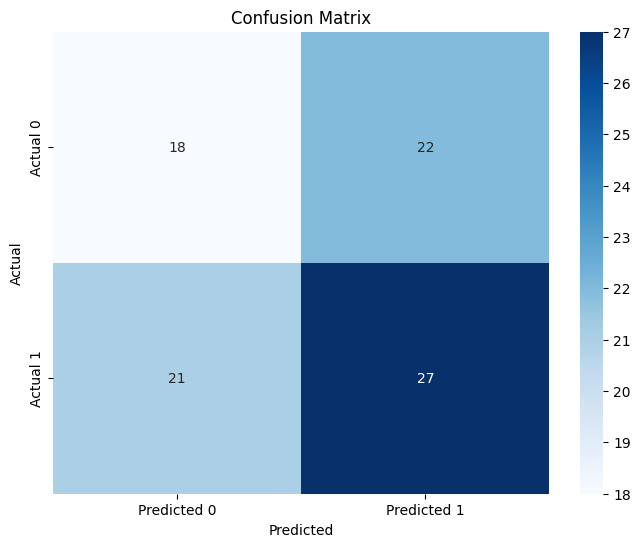

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


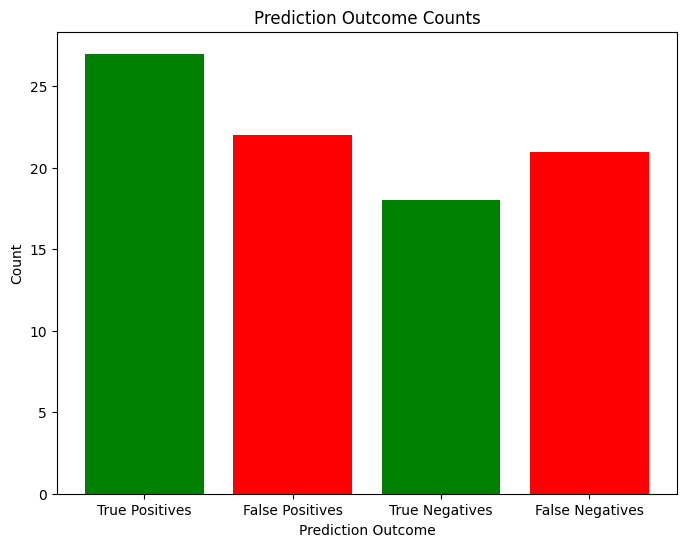

In [ ]:
# Calculate counts for true positives, false positives, true negatives, false negatives
tp = matrix[1, 1]
fp = matrix[0, 1]
tn = matrix[0, 0]
fn = matrix[1, 0]

# Plot bar graph
plt.figure(figsize=(8, 6))
bars = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
values = [tp, fp, tn, fn]
colors = ['green', 'red', 'green', 'red']  # Green for correct predictions, red for incorrect

plt.bar(bars, values, color=colors)
plt.xlabel('Prediction Outcome')
plt.ylabel('Count')
plt.title('Prediction Outcome Counts')
plt.show()
